In [1]:
import numpy
import sys
sys.path.append('../../main/regression/')
import scipy.io
import biasVarModelAvg

#### To Be Specified
filename = 'NB_n=100000_d=500.mat' 

# load data
dataname = filename[0:2]
dataDict = scipy.io.loadmat(filename)
matX = dataDict['matX']
vecW = dataDict['vecW']
print(matX.shape)
matU, vecS, matV = numpy.linalg.svd(matX, full_matrices=False)

(100000, 500)


In [2]:
s = 1000
gamma = 1e-6
xi = 0.1
vecG = [1, 2, 3, 4, 6, 8, 12, 16, 20, 25, 30]
method = 'tilde'

resultDict = biasVarModelAvg.bvExperiment(matX, vecW, s, gamma, xi, vecG, method)
print(resultDict)

outputFileName = 'avg_' + method +'_' + dataname + '_s' + str(s) + '_gam' + str(gamma) + '.mat'
scipy.io.savemat(outputFileName, resultDict)


Doing uniform sampling...
Doing leverage score sampling...
Doing shrinkage leverage score sampling...
Doing Gaussian projection...
Doing SRFT...
Doing count sketch...
{'g': [1, 2, 3, 4, 6, 8, 12, 16, 20, 25, 30], 'varGauss': array([  7.76540858e-05,   7.02323081e-05,   6.77223280e-05,
         6.64131158e-05,   6.51512031e-05,   6.45306431e-05,
         6.38706452e-05,   6.35435693e-05,   6.33702204e-05,
         6.32062567e-05,   6.30886875e-05]), 'biasShrink': array([ 0.02046875,  0.05539925,  0.05658248,  0.04303551,  0.04066382,
        0.03636203,  0.02558084,  0.02344748,  0.02511384,  0.02139308,
        0.01930251]), 'biasLev': array([ 0.00911748,  0.00911827,  0.00879247,  0.00871662,  0.01305494,
        0.01178866,  0.01053238,  0.00989245,  0.00956309,  0.00935257,
        0.00915304]), 'xi': 0.1, 'varLev': array([  8.51437446e-05,   8.05596533e-05,   7.91382303e-05,
         7.81960956e-05,   9.22086437e-05,   8.63476986e-05,
         8.16171436e-05,   7.96598067e-05,   7.

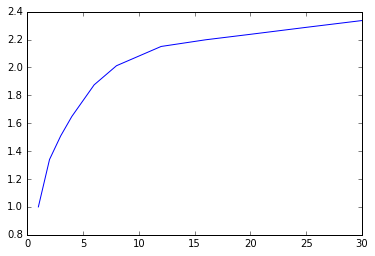

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

result = resultDict['biasGauss']
plt.plot(resultDict['g'], result[0] / result)
plt.show()

In [47]:
matVW0 = numpy.dot(matV, vecW)
gamma = 1e-12
xi = 0.1
bias, var = bvAvgHat(vecS, matU, matVW0, gamma, xi, 'srft', 2000, 1)
print(bias ** 2)
print(var)

1.37195419192e-05
4.24994331919e-05


In [48]:

bias, var = bvAvgHat(vecS, matU, matVW0, gamma, xi, 'srft', 2000, 4)
print(bias ** 2)
print(var)

5.25404861186e-06
3.83116132291e-05


In [49]:

bias, var = bvAvgHat(vecS, matU, matVW0, gamma, xi, 'srft', 2000, 8)
print(bias ** 2)
print(var)

3.26710178337e-06
3.74747604589e-05


In [4]:
vecG = [1, 2, 3, 4, 6, 8, 12, 16, 20, 25, 30]
setG = set(vecG)
2 + 2 in setG

True

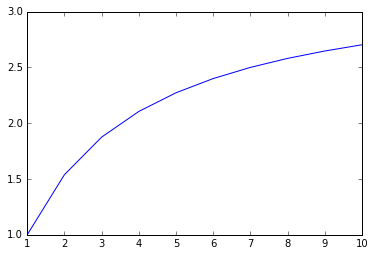

In [12]:
g = numpy.array(range(10)) + 1
eta = 0.3
y = eta / g + eta ** 2 / (1-eta)

plt.plot(g, y[0] / y)
plt.show()